## <p style="text-align: right;"> &#9989; Nic Wiggins </p>

You **NEED** to participate both individually and in groups in class to successfully complete this assignment and receive credits for it.

# In-Class Assignment: Least Squares Fit (LSF)

<img src="https://goo.gl/urheBA" width="50%">
</p>


### Agenda for today's class (80 minutes)

</p>
1. (20 minutes) LSF Pre-class Review
1. (30 minutes) Finding the best solution in an overdetermined system
1. (30 minutes) Pseudoinverse

---
# 1. LSF Pre-class Review
[17--LSF-pre-class-assignment](../preclass/19--LSF-pre-class-assignment.ipynb)

----

# 2. Finding the best solution in an overdetermined system

Let $Ax = y$ be a system of $m$ linear equations in $n$ variables. A *least squares solution* of $Ax = y$ is an element $\hat{x}$ in $R^n$ such that:

$$ \min_{\hat{x}}~\|y - A\hat{x}\|.$$

In other words, $\hat{x}$ is a value of $x$ for which $Ax$ is as close as possible to $b$. From previous lectures, we know this to be true if the vector $$y - A\hat{x}$$ is orthogonal (perpendicular) to the column space of $A$.

We also know that the dot product is zero if two vectors are orthogonal. So we have  
$$a_1 \cdot (Ax - y)  = 0, $$
for all $a_1$ in the column spaces of $A$.

The columns of $A$ span the column space of $A$. Denote the columns of $A$ as 
$$A = [a_1, \cdots, a_n].$$ 
Then we have 
$$a_1^\top (Ax - y)  = 0, \\ a_2^\top(Ax-y)=0\\\vdots \\a_n^\top(Ax-y)=0.$$
It is the same as taking the transpose of $A$ and doing a matrix multiply:
$$A^\top (Ax - y) = 0.$$

That is:

<font size=40>$$A^\top Ax = A^\top y$$</font>

The above equation is called the *least squares solution* to the original equation $Ax=y$.  

**Example:** A researcher has conducted experiments of a particular Hormone dosage in a population of rats. The table shows the number of fatalities at each dosage level tested. Determine the least squares line and use it to predict the number of rat fatalities at hormone dosage of 22. 

| Hormone level  | 20 | 25 | 30 | 35 | 40 | 45 | 50  |
|---|---|---|---|---|---|---|---|
| Fatalities | 101 | 115 | 92 | 64 | 60 | 50 | 49| 


In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import sympy as sym
import time
sym.init_printing(use_unicode=True)

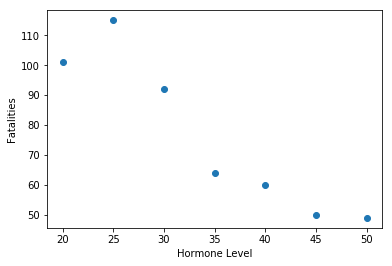

In [2]:
H = [20,25,30,35,40,45,50]
f = [101,115, 92,64,60,50,49]

plt.scatter(H,f)
plt.xlabel('Hormone Level')
plt.ylabel('Fatalities')
f = np.matrix(f).T

<font color=red>** DO THIS:**</font> You want to determine a line that is expressed by the following equation 
$$f = a+b*H,$$
to approximate the connection between Hormone dosage ($H$) and Fatalities $f$. 
That is, you want to find $a$ and $b$ for this line. You can put $x=[a; b]$ as one column vector that you need to solve.

Construct your matrices $A$ and $y$.

In [7]:
#####Start your code here #####

A = np.matrix([[20, 1],[25, 1],[30, 1],[35, 1],[40, 1],[45, 1],[50, 1]])
y = np.matrix([[101],[115],[92],[64],[60],[50],[49]])
print(A)
print(y)
#####End of your code here#####

[[20  1]
 [25  1]
 [30  1]
 [35  1]
 [40  1]
 [45  1]
 [50  1]]
[[101]
 [115]
 [ 92]
 [ 64]
 [ 60]
 [ 50]
 [ 49]]


<font color=red>**QUESTION:**</font> Calculate the square matrix $C = A^\top A$ and the modified right hand side vector as $A^\top y$

In [8]:
#####Start your code here #####
C   = A.T*A
Aty = A.T*y

print(C)
print(Aty)
#####End of your code here#####

[[9275  245]
 [ 245    7]]
[[16995]
 [  531]]


<font color=red>** QUESTION:**</font> Find the *least squares solution* by solving $Cx=Aty$ for $x$.

In [10]:
#####Start your code here #####
x = np.linalg.inv(C)*Aty
#####End of your code here#####

<font color=red>** QUESTION:**</font> Plot the original data and the line estimated by the coefficient found in the above quation.

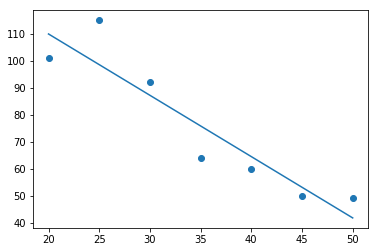

In [20]:
H = [20,25,30,35,40,45,50]
f = [101,115, 92,64,60,50,49]
H2 = np.linspace(np.min(H), np.max(H))
plt.scatter(H,f)
#####Start your code here #####
f2 = x.item(0)*H2 + x.item(1)
plt.plot(H2,f2)
#####End of your code here#####

<font color=red>** QUESTION:**</font> Repeat the above analysis but now with a eight-order polynomial.

In [55]:
h = np.array(H)
h**2

array([ 400,  625,  900, 1225, 1600, 2025, 2500])

[[ 1.55057995e+04]
 [-3.10001910e+03]
 [ 2.52237659e+02]
 [-1.06205502e+01]
 [ 2.44419638e-01]
 [-2.92263665e-03]
 [ 1.42220796e-05]]


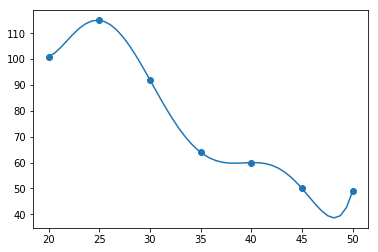

In [65]:
n = 7

A = np.ones((len(H), n))

#####Start your code here #####
h = np.array(H)
for i in range(n):
    A[:,i] = h**i
A = np.matrix(A)
C   = A.T*A
Aty = A.T*y
x = np.linalg.inv(C)*Aty
print(x)

H = [20,25,30,35,40,45,50]
f = [101,115, 92,64,60,50,49]
H2 = np.linspace(np.min(H), np.max(H))
plt.scatter(H,f)
#####Start your code here #####
f8 = 0*H2
for i in range(n):
    f8 += x.item(i)*H2**i
plt.plot(H2,f8)
#####End of your code here#####


<font color=red>** QUESTION:**</font> Check the rank of $C=A^\top A$ for the previous case. What do you get? Why?

7
Rank has to be same dim as rows or else singular and cannot take inverse. 

----
# 3. Pseudoinverse

+ Consider a $m\times n$ matrix $A$ where its rank $r$ maybe less than $m$ and $n$ ($r\leq m$ and $r\leq n$). This is the very general case.
+ Remember that the rowspace of $A$ is in $R^n$ with dimension $r$ and the columnspace of $A$ is in $R^m$ also with dimension $r$.
+ The nullspace of $A$ is in $R^n$ with dimension $n-r$ and the nullspace of $A^\top$ is in $R^m$ with dimension $m-r$.
+ Because the rowspace of $A$ and column space $A$ have the same dimension. Therefore, we can find a linear transform that maps one point from the rowspace to one and only one point in the columnspace, vice verse. 
    + For any $x$ in the rowspace, we have that $Ax$ is one point in the columnspace. If $x'$ is another point in the row space different from $x$, we have $Ax\neq Ax'$ (The mapping is one-to-one). For any $y$ in the columnspace, we can find $x$ in the rowspace such that $y=Ax$ (The mapping is onto). 
    + Therefore, $A$ is the one-to-one mapping from the rowspace to the columnspace. 

+ The pseudoinverse $A^+$, which is a $n\times m$ matrix, maps $y=Ax$ from the columnspace to the rowspace
$$ x={A}^{+}{Ax} =A^+y$$

## How to compute pseudoinverse
We want to find the $n\times m$ matrix that maps from columnspace to the rowspace of $A$, and 
$$x=A^+Ax,$$
if $x$ is in the rowspace. 

+ Let's apply SVD on $A$: $$A= U\Sigma V^\top,$$
where $U$ is a $m\times m$ matrix, $V^\top$ is a $n\times n$ matrix, and $\Sigma$ is a diagonal $m\times n$ matrix. 
We can decompose the matrices as 
$$A = \begin{bmatrix}\vdots & \vdots \\ U_1 & U_2 \\ \vdots &\vdots\end{bmatrix} \begin{bmatrix}\Sigma_1 & 0 \\ 0 & 0\end{bmatrix}  \begin{bmatrix}\cdots & V_1^\top & \cdots \\ \cdots & V_2^\top &\cdots \end{bmatrix}.$$
Here $U_1$ is of $m\times r$, $U_2$ is of $m\times (m-r)$, $\Sigma_1$ is of $r\times r$, $V_1^\top$ is of $r\times n$, and $V_2^\top$ is of $(n-r)\times n$. 
    + The columnspace of $U_1$ is the columnspace of $A$, and columnspace of $U_2$ is the nullspace of $A^\top$. 
    + The rowspace of $V_1$ is the rowspace of $A$, and rowspae of $V_2$ is the nullspace of $A$.

+ If $x$ is in the rowspace of $A$, we have that $V_2^\top x=0$. We have $Ax = U_1\Sigma_1 V_1^\top x$.
    + If we define a matrix $B=V_1\Sigma_1^{-1}U_1^\top$, we have that $BAx=V_1\Sigma_1^{-1}U_1^\top U_1\Sigma_1 V_1^\top x=V_1V_1^\top x$. That is $BAx=x$ is $x$ is in the rowspace of $A$. 
    
+ The matrix $B$ is the pseudoinverse of matrix $A$. 
$$A^+ = V_1\Sigma_1^{-1}U_1^\top$$
$$A^+ = \begin{bmatrix}\vdots & \vdots \\ V_1 & V_2 \\ \vdots &\vdots\end{bmatrix} \begin{bmatrix}\Sigma_1^{-1} & 0 \\ 0 & 0\end{bmatrix}  \begin{bmatrix}\cdots & U_1^\top & \cdots \\ \cdots & U_2^\top &\cdots \end{bmatrix}.$$

**Example 1:** Let $$A=[1,2]$$
we know that 
$r=m=1$ and $n=2$.
<font color=red>**DO THIS:**</font> Calculate the pseudoinverse $A^+$ of $A$.

In [ ]:
#####Start your code here #####

#####End of your code here#####

<font color=red>**DO THIS:**</font> Compute $AA^+$ and $A^+A$

In [ ]:
#####Start your code here #####

#####End of your code here#####

<font color=red>**QUESTION:**</font> If $x$ is in the nullspace of $A$ what is the effect of $A^+Ax$?

Put your answer to the above question here

<font color=red>**QUESTION:**</font> If $x$ is in the rowspace of $A$ what is the effect of $A^+Ax$?

Put your answer to the above question here

## Left inverse is pseudoinverse

We can compute the left inverse of $A$ if $r=n\leq m$. In this case, we may have more rows than columns, and the matrix $A$ has full column rank. 

In this case, the SVD of $A$ is 
$$A = U\Sigma V^\top   .$$
Here $U$ is of $m\times m$, $\Sigma$ is of $n\times n$ and nonsingular, $V^\top$ is of $n\times n$. 
The pseudoinverse of $A$ is $$A^+ = V\Sigma^{-1}U^\top$$

The left inverse of $A$ is 
$$(A^\top A)^{-1}A^\top= (V\Sigma U^\top U\Sigma V^\top  )^{-1} V\Sigma U^\top = V(\Sigma \Sigma )^{-1} V^\top V\Sigma U^\top =  V\Sigma ^{-1} U^\top =A^+$$

**Example 2:** Let $$A=\begin{bmatrix}1\\2\end{bmatrix}$$
we know that 
$r=n=1$ and $m=2$. Then we have the left inverse.
<font color=red>**DO THIS:**</font> Calculate the pseudoinverse $A^+$ of $A$.

Put your answer to the above question here


<font color=red>**DO THIS:**</font> Calculate the left inverse of $A$, and verify that it is the same as $A^+$.

Put your answer to the above question here

-----
### Congratulations, we're almost done!

Now, you just need to submit this assignment by uploading it to the course <a href="https://d2l.msu.edu/">Desire2Learn</a> web page for today's dropbox (Don't forget to add your names in the first cell).


&#169; Copyright 2018,  Michigan State University Board of Trustees